<a href="https://colab.research.google.com/github/SH-IZU/hey_world/blob/master/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import matplotlib.pyplot as plt

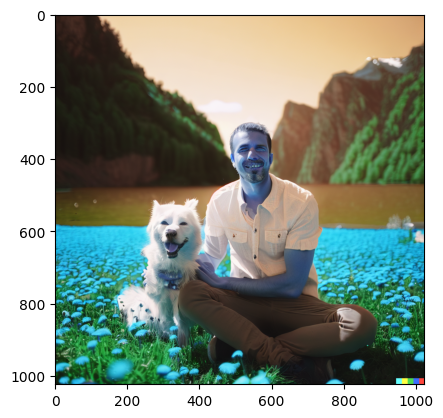

In [2]:
image = cv2.imread('/content/dogman.png', 1)
original_image = image.copy()
plt.imshow(image)

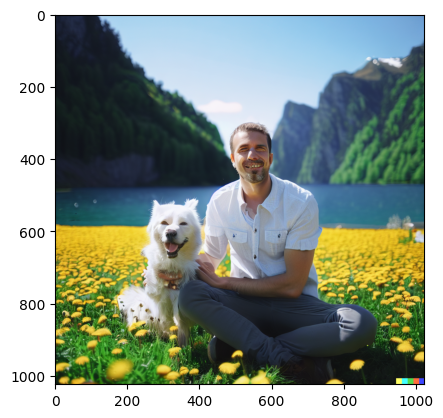

In [3]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

In [4]:
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

In [5]:
classes = []
with open('coco.names', 'r') as f:
#     print(f.readlines())
    classes = [line.strip() for line in f.readlines()]
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
classes[57]

'sofa'

In [7]:
file = open('coco.names')
x = file.read()
print(x.split('\n'))
file.close()

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [8]:
layer_names = net.getLayerNames()

In [9]:
output_layer = [layer_names[i-1] for i in net.getUnconnectedOutLayers()]

In [10]:
output_layer

['yolo_82', 'yolo_94', 'yolo_106']

In [11]:
height, width,depth = rgb_image.shape
height, width,depth

(1024, 1024, 3)

In [12]:
blob = cv2.dnn.blobFromImage(rgb_image, 0.003, (224, 224), (0, 0, 0), True)


In [13]:
blob

array([[[[0.141, 0.141, 0.138, ..., 0.618, 0.618, 0.618],
         [0.147, 0.141, 0.138, ..., 0.621, 0.621, 0.627],
         [0.144, 0.147, 0.138, ..., 0.627, 0.624, 0.63 ],
         ...,
         [0.066, 0.057, 0.045, ..., 0.765, 0.765, 0.765],
         [0.06 , 0.066, 0.051, ..., 0.765, 0.765, 0.765],
         [0.063, 0.06 , 0.036, ..., 0.765, 0.765, 0.765]],

        [[0.087, 0.09 , 0.084, ..., 0.456, 0.453, 0.447],
         [0.093, 0.09 , 0.09 , ..., 0.462, 0.456, 0.456],
         [0.09 , 0.093, 0.087, ..., 0.471, 0.465, 0.465],
         ...,
         [0.117, 0.117, 0.234, ..., 0.21 , 0.21 , 0.21 ],
         [0.099, 0.117, 0.315, ..., 0.21 , 0.21 , 0.21 ],
         [0.087, 0.09 , 0.12 , ..., 0.21 , 0.21 , 0.21 ]],

        [[0.072, 0.072, 0.069, ..., 0.318, 0.315, 0.312],
         [0.078, 0.072, 0.069, ..., 0.321, 0.315, 0.309],
         [0.075, 0.072, 0.069, ..., 0.327, 0.324, 0.315],
         ...,
         [0.054, 0.051, 0.285, ..., 0.18 , 0.18 , 0.18 ],
         [0.051, 0.06 , 0.

In [14]:
net.setInput(blob)
outs = net.forward(output_layer)

In [15]:
print(len(outs))
print(outs)

3
(array([[0.07441368, 0.07668252, 0.82070154, ..., 0.        , 0.        ,
        0.        ],
       [0.09613428, 0.06526143, 0.63021934, ..., 0.        , 0.        ,
        0.        ],
       [0.08395545, 0.07182721, 1.5615844 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.92775095, 0.90158325, 0.59119326, ..., 0.        , 0.        ,
        0.        ],
       [0.92651933, 0.92100185, 0.51850814, ..., 0.        , 0.        ,
        0.        ],
       [0.939017  , 0.9197979 , 1.5844759 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.03810202, 0.04811995, 0.09765391, ..., 0.        , 0.        ,
        0.        ],
       [0.03818885, 0.03829464, 0.66971916, ..., 0.        , 0.        ,
        0.        ],
       [0.04214012, 0.03049199, 0.13851438, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9497472 , 0.9540574 , 0.09555592, ..., 0.        , 0.        ,
        0.        ],
       [0.964241

In [16]:
len(outs[2])

2352

In [17]:
len(outs[2])

2352

In [18]:
outs[2][2001]

array([8.3608431e-01, 8.3666027e-01, 5.3624600e-02, 4.8660211e-02,
       2.8313489e-06, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

[0]
[0.9345487356185913]
[[301, 314, 514, 618]]
[0.54514414 0.6093644  0.5026384  0.6035167  0.95564085 0.93454874
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[0, 0]
[0.9345487356185913, 0.9633157253265381]
[[301, 314, 514, 618], [254, 287, 603, 700]]
[0.54363084 

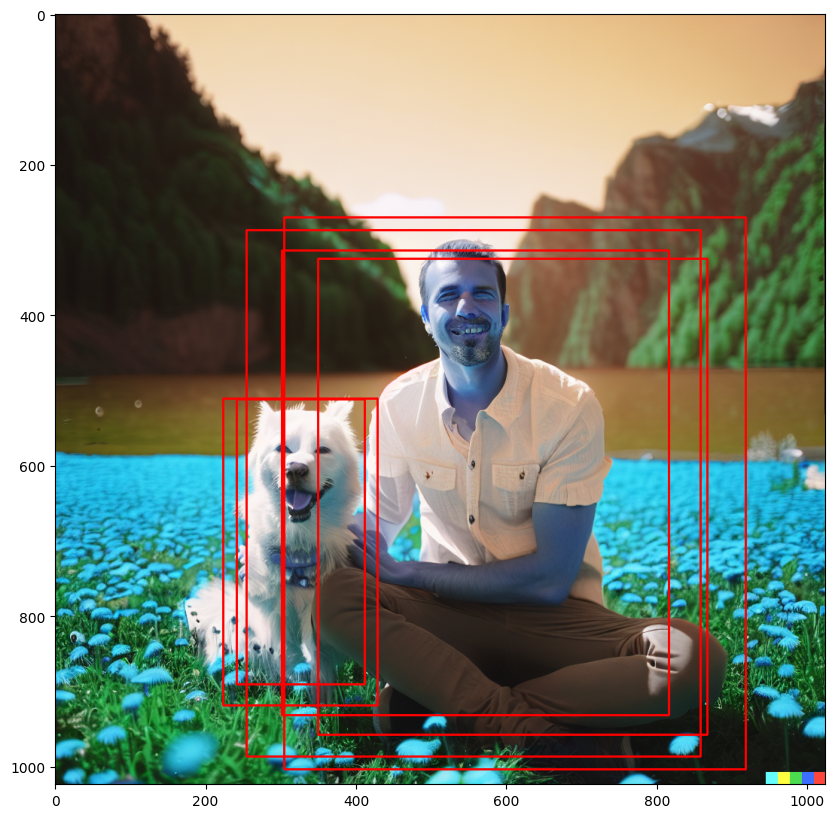

In [19]:
import numpy as np
class_ids = []
boxes = []
confidences = []

for out in outs:
    for det in out:
        scores = det[5:]
        class_id = np.argmax(scores)
        # print(class_id)
        confidence = scores[class_id]
        # if confidence > 0:
        #     print(class_id )
        #     print(det)

        if confidence > 0.6:
            # print(det)
            cx = int(det[0] * width)
            cy = int(det[1] * height)

            w = int(det[2] * width)
            h = int(det[3] * height)

            x, y = int(cx - w / 2), int(cy - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            print(class_ids)
            print(confidences)
            print(boxes)
            print(det)
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
plt.figure(figsize = (20,10))
plt.imshow(image)

6
[3 4]
304 270 613 734
person
241 512 170 379
dog


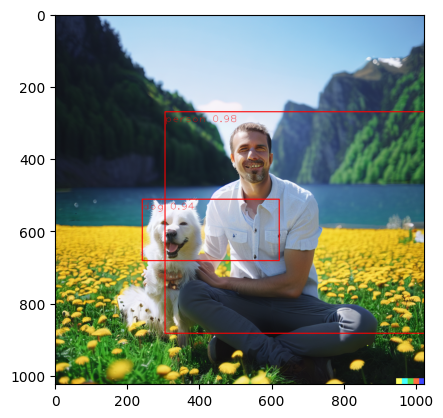

In [21]:
n_det = len(boxes)
print(n_det)
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.3)
print(indexes)
for i in range(n_det):
    if i in indexes:
        x, y, w, h = boxes[i]
        print(x, y, w, h)
        label = str(classes[class_ids[i]])
        conf = confidences[i]
        print(label)
        cv2.rectangle(rgb_image, (x, y), (x+h, y+w), (255, 0, 0), 2)
        cv2.putText(rgb_image, f"{label} {round(conf,2)}", (x, y+30), cv2.FONT_HERSHEY_PLAIN, 2, (255, 0, 0), 1)

plt.imshow(rgb_image)